# Name - Ashwini Nitin More
# Data Science Intern @ LetsGrowMore

## Task 3
## Intermediate Level 
## Name of Project : Prediction Using Decision Tree Algorithm

# Dataset http://archive.ics.uci.edu/ml/datasets/Iris

### About Dataset

• The data set contains 3 classes with 50 instances each, and 150 instances in total, where

   each class refers to a type of iris plant.

• Class: Iris Setosa,Iris Versicolour, Iris Virginica

• Format for the data: (sepal_length, sepalwidth, petal_length, petal width)

### ML Algorithm used in the Project
-Decision Tree Algorithm

# Impoting The Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df['species_class']=np.where(df.species=='Iris-virginica',1,np.where(df.species=='Iris-versicolor',2,3))

In [9]:
df.species_class.value_counts()

3    50
2    50
1    50
Name: species_class, dtype: int64

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_class'],
      dtype='object')

In [11]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Model Preparation

In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( df[cols],
                                                  df['species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

# Model Building

In [13]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [19]:
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [20]:
tree.best_score_

0.95

In [21]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=3)

In [22]:
tree.best_params_

{'max_depth': 4, 'max_features': 3}

In [23]:
train_pred = tree.predict(train_X)

In [24]:
test_pred = tree.predict(test_X)

In [25]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.73      0.84        11
           2       0.67      1.00      0.80         6
           3       1.00      1.00      1.00        13

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.88        30
weighted avg       0.93      0.90      0.90        30



# Building Decision Tree

In [26]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [27]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [28]:
tree_test_pred.sample( n = 10 )

,actual,predicted
37,3,3
90,2,2
24,3,3
4,3,3
141,1,1
20,3,3
112,1,1
72,2,2
59,2,2
104,1,1


In [29]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9666666666666667

Text(0.5, 15.0, 'Predicted label')

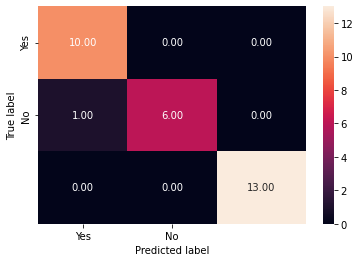

In [32]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Graphical Representation of Decision Tree

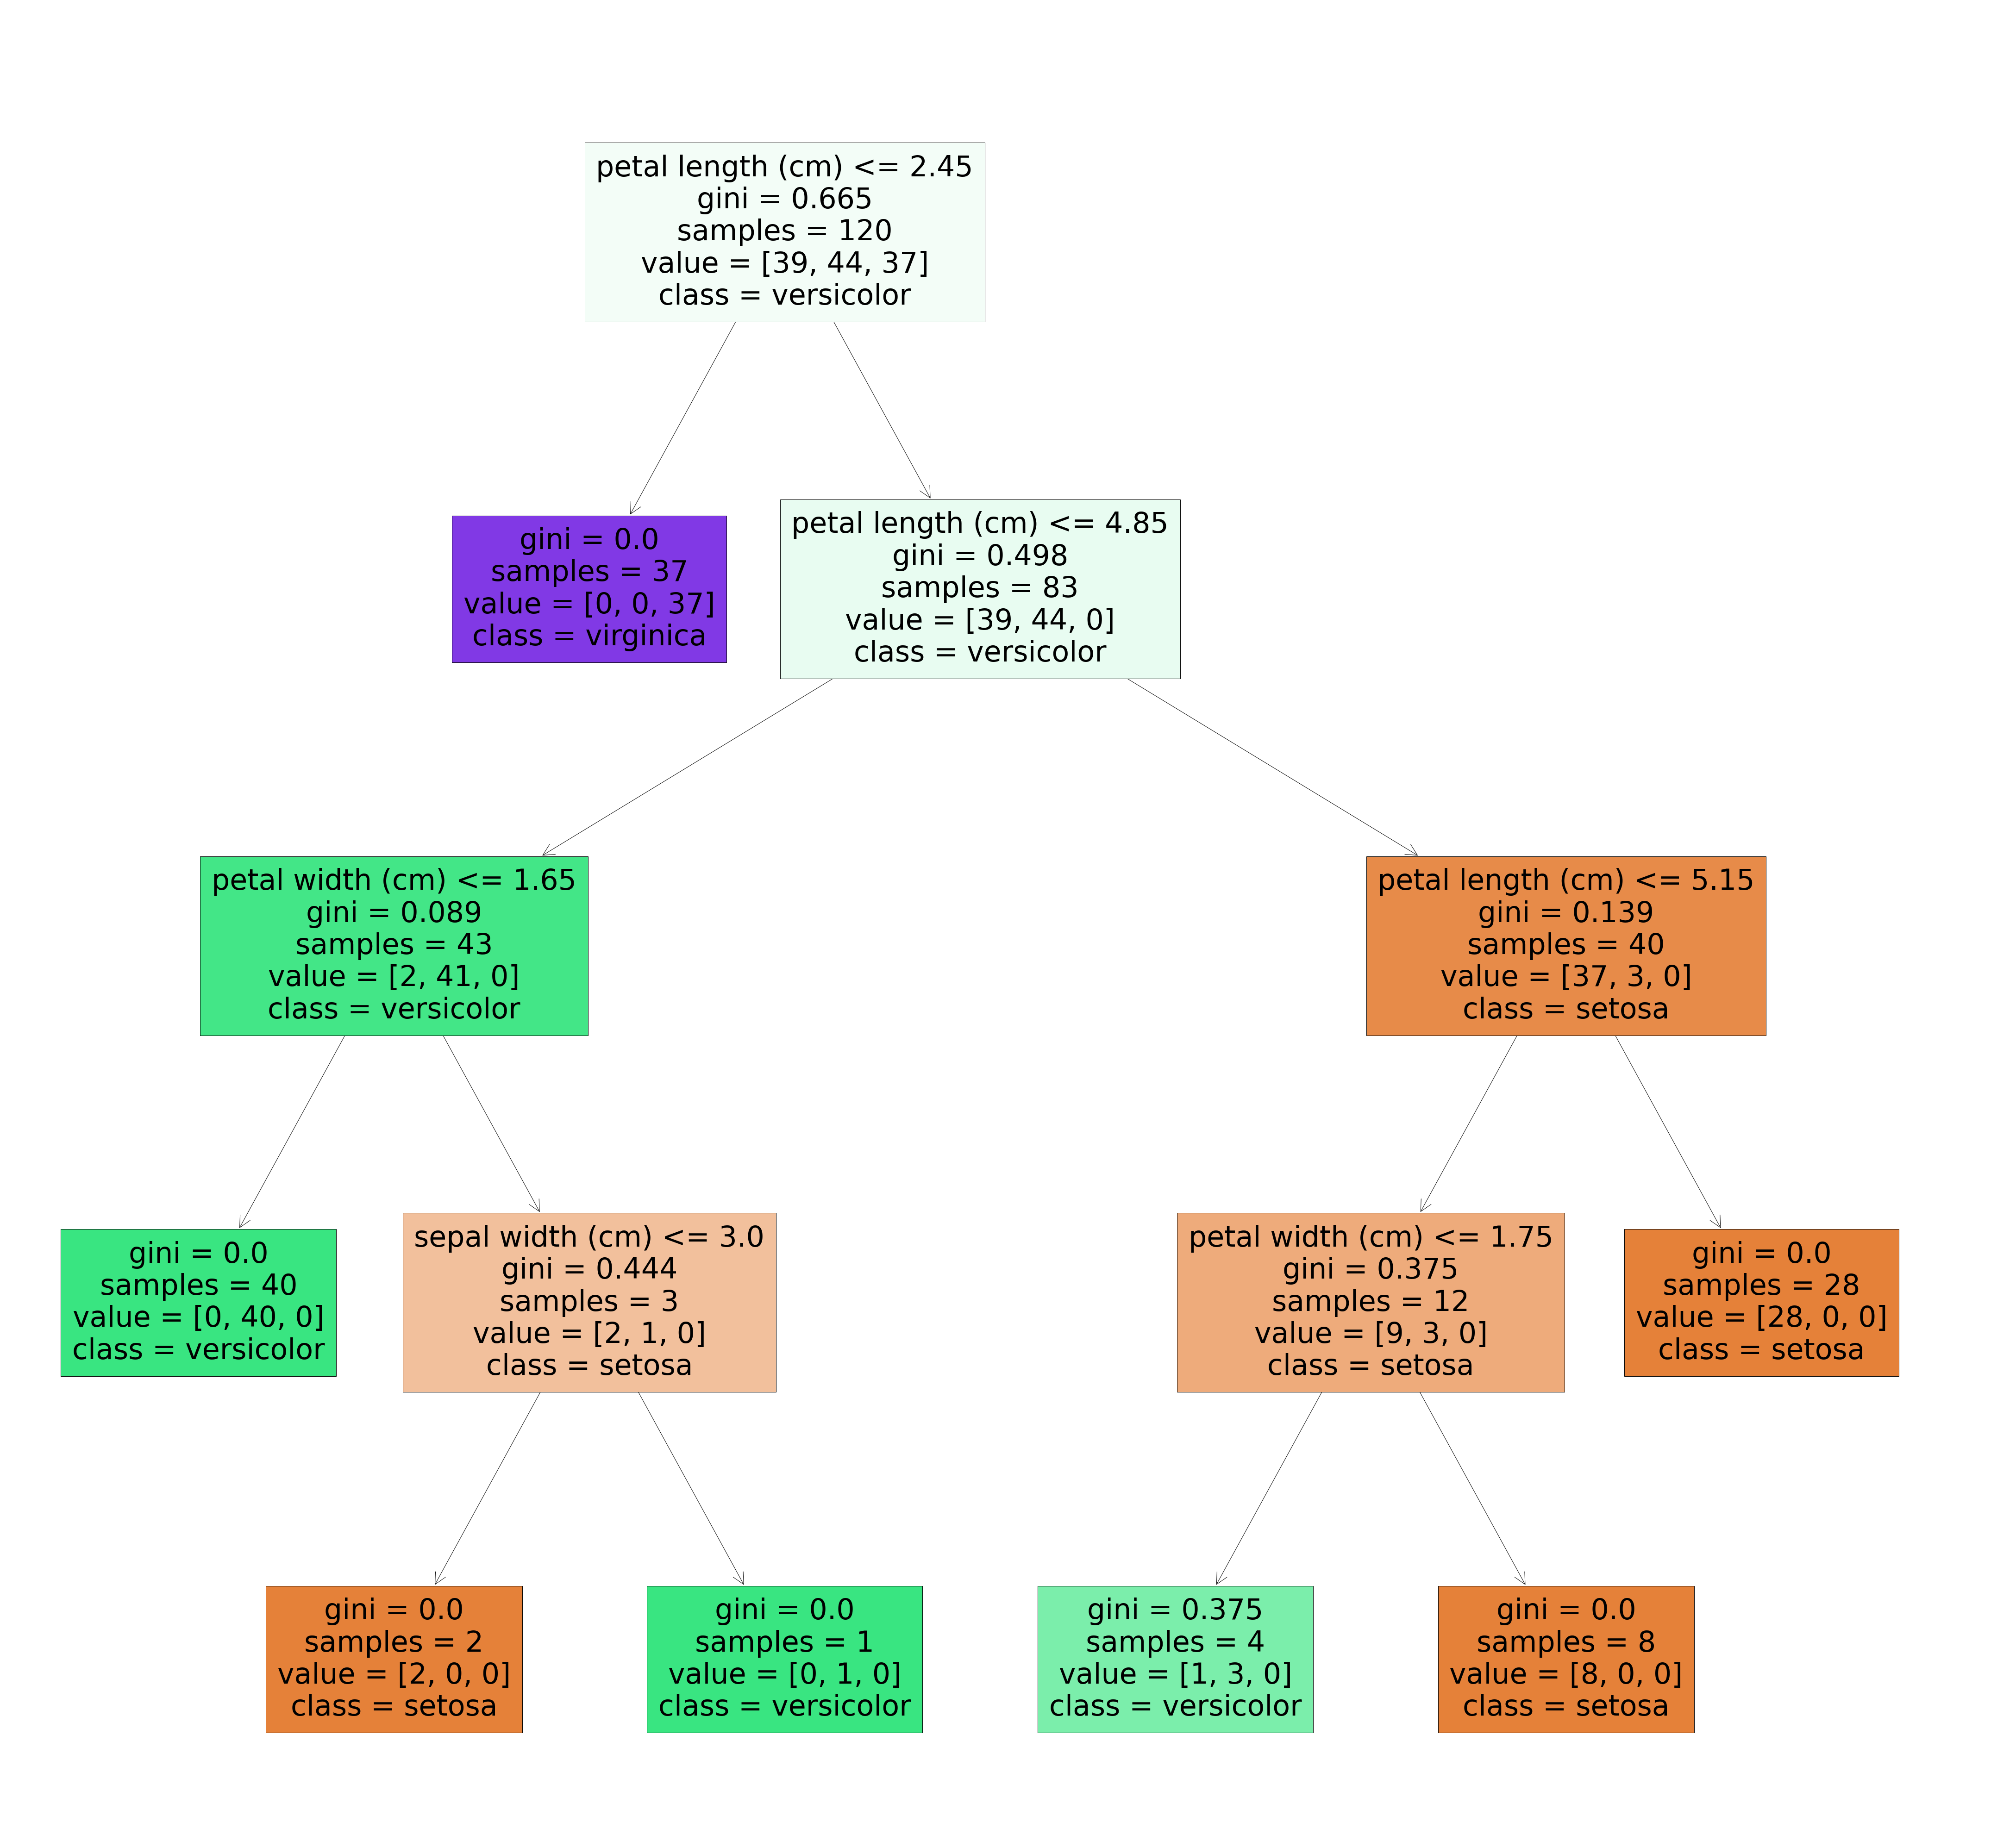

In [40]:
from sklearn import tree
ln=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
sn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (80,75), dpi=70)
tree.plot_tree(clf_tree,
               feature_names = ln, 
               class_names=sn,
               filled = True);
fig.savefig('decisionTree.png')